In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/student_clustering.csv')

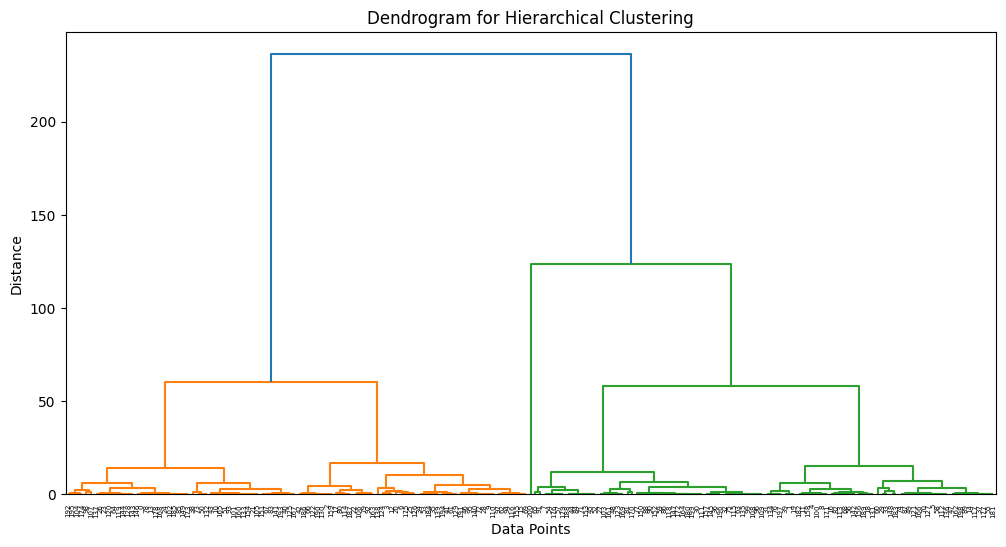

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

data = pd.read_csv('/content/drive/My Drive/student_clustering.csv')
X = data[['cgpa', 'iq']]

# Perform hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(X)

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


Outliers

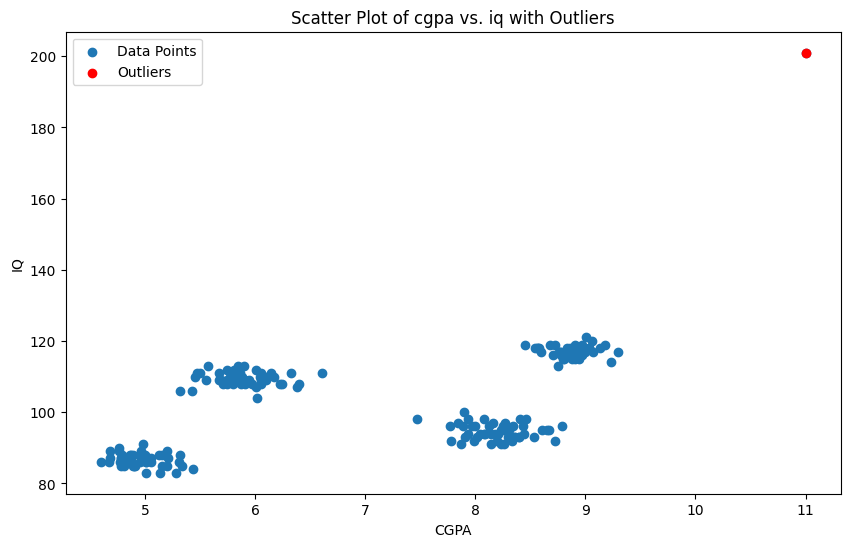

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/My Drive/student_clustering.csv')  # Replace 'your_data.csv' with your dataset file path
columns_of_interest = ['cgpa', 'iq']
subset = data[columns_of_interest]

# Calculate the IQR (Interquartile Range) for each column
Q1 = subset.quantile(0.25)
Q3 = subset.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5
# Find outliers using the IQR method
outliers = ((subset < (Q1 - outlier_threshold * IQR)) | (subset > (Q3 + outlier_threshold * IQR))).any(axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(data['cgpa'], data['iq'], label='Data Points')

plt.scatter(data[outliers]['cgpa'], data[outliers]['iq'], color='red', label='Outliers')

plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter Plot of cgpa vs. iq with Outliers')
plt.legend()
plt.show()
